## Phillies Baseball R&D Questionnaire

### Alex Xu

#### Part a

The following Python function checks whether a string is a palindrome. Please explain, in 250 words or less, how you'd improve this code and why. We’re not looking for a simple one-line rewrite here - submissions will be graded based on the clarity by which you describe what the improvements are, and also WHY they should be made.

In [ ]:
def is_palindrone(s):
    r=""
    for c in s:
        r = c +r
    for x in range(0, len(s)):
        if s[x] == r[x]:
            x = True
        else:
            return False
    return x

**Answer:** 
The function checks if a string is a palindrome by iterating through a string `s` and appending it to a reversed string `r`, after which it checks each character of `s` with `r`.

To ensure clarity, spelling the function name correctly to *is_palindrome*, writing proper documentation (docstring/comments), and having meaningful variable names can go a long way in making sure your code is readable/accurate. For example, in the first loop,  you can use the variable name `char` for the looping variable and perhaps `reversed` for `r`. 

The function reverses a string using a loop, but you could consider directly comparing the elements of the front and back half of the string to reduce memory usage. 

In the second for loop, the looping variable `x` also gets assigned the truth value every iteration. This is poor practice as what happens is `True` gets assigned to x if the characters match, before being re-assigned the count of the loop and so on. A possible improvement is changing the if condition to `if s[x] != r[x]` and returning `False` if satisfied, and returning `True` at the end of the function if the string is a palindrome. You can also forgo using a loop and simply return the equality expression of `r == s` to accomplish the same task.

Lastly, it is not clear how the function ought to handle case-sensitivity, whitespace, and non-alphanumeric characters if at all, if so, other conditions must be added to the function body. 

#### Part b

In baseball, a team can provide a departing free agent player with a qualifying offer: a one-year contract whose monetary value is the average of the 125 highest salaries from the past season. The player is free to reject it and sign with any other team, but his new team will have to forfeit a draft pick.

Use the provided dataset to write a program or application that determines the monetary value of the upcoming qualifying offer and displays the amount along with any other relevant information or visualizations to the user. Note that while the URL and general format of the data will be consistent, the data itself can change slightly with each page load, so make sure your code pulls the data each time it is run and expect the final result to change each time.

You should submit a link or file containing your response to the question, including all source code. The link or file should contain a README that contains clear, step-by-step instructions for how to run or access your response.

Submissions will be graded on accuracy, readability, reproducibility, error handling and presentation of the result to the user. Use of online resources such as Stack Overflow is encouraged, but please cite (by including a comment in your code with a link to the resource) any answers used and provide comments on your particular implementation if appropriate. Use of open-source/third-party libraries is encouraged.

Data: https://questionnaire-148920.appspot.com/swe/data.html

Tip: As is often the case, the data sometimes contains corrupted or malformed values. Do your best to handle these and feel free to ignore missing values, but make sure they don’t interfere with the calculation or presentation of the final result.

#### Imports

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import figure

#### Data Cleaning

In [59]:
url = 'https://questionnaire-148920.appspot.com/swe/data.html'
table = pd.read_html(url) #read table from raw html

In [60]:
salary_table = table[0]

In [61]:
salary_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  1208 non-null   object
 1   Salary  1180 non-null   object
 2   Year    1208 non-null   int64 
 3   Level   1208 non-null   object
dtypes: int64(1), object(3)
memory usage: 37.9+ KB


In [62]:
salary_table.dropna(subset=['Salary'],inplace = True) #remove missing values

In [63]:
salary_table = salary_table.drop(salary_table[salary_table.Salary == 'no salary data'].index)
#remove rows with 'no salary data'

In [64]:
salary_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1161 entries, 0 to 1207
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  1161 non-null   object
 1   Salary  1161 non-null   object
 2   Year    1161 non-null   int64 
 3   Level   1161 non-null   object
dtypes: int64(1), object(3)
memory usage: 45.4+ KB


In [65]:
salary_table['Salary'] = salary_table['Salary'].str.replace('\,', '',regex = True) #remove commas signs
salary_table['Salary'] = salary_table['Salary'].str.replace('\$', '',regex = True) #remove dollar signs
salary_table['Salary'] = salary_table['Salary'].astype(int) #convert to int

#### Top 125 Salaries & Qualifying Offer

In [66]:
top_salary_125 = salary_table.nlargest(125, 'Salary') #get top 125 salaries

In [67]:
print('The value of the qualifying offer of MLB in 2016 is ${}'.format(top_salary_125['Salary'].mean())) #calculate average salary

The value of the qualifying offer of MLB in 2016 is $16408022.712


#### Visualizations

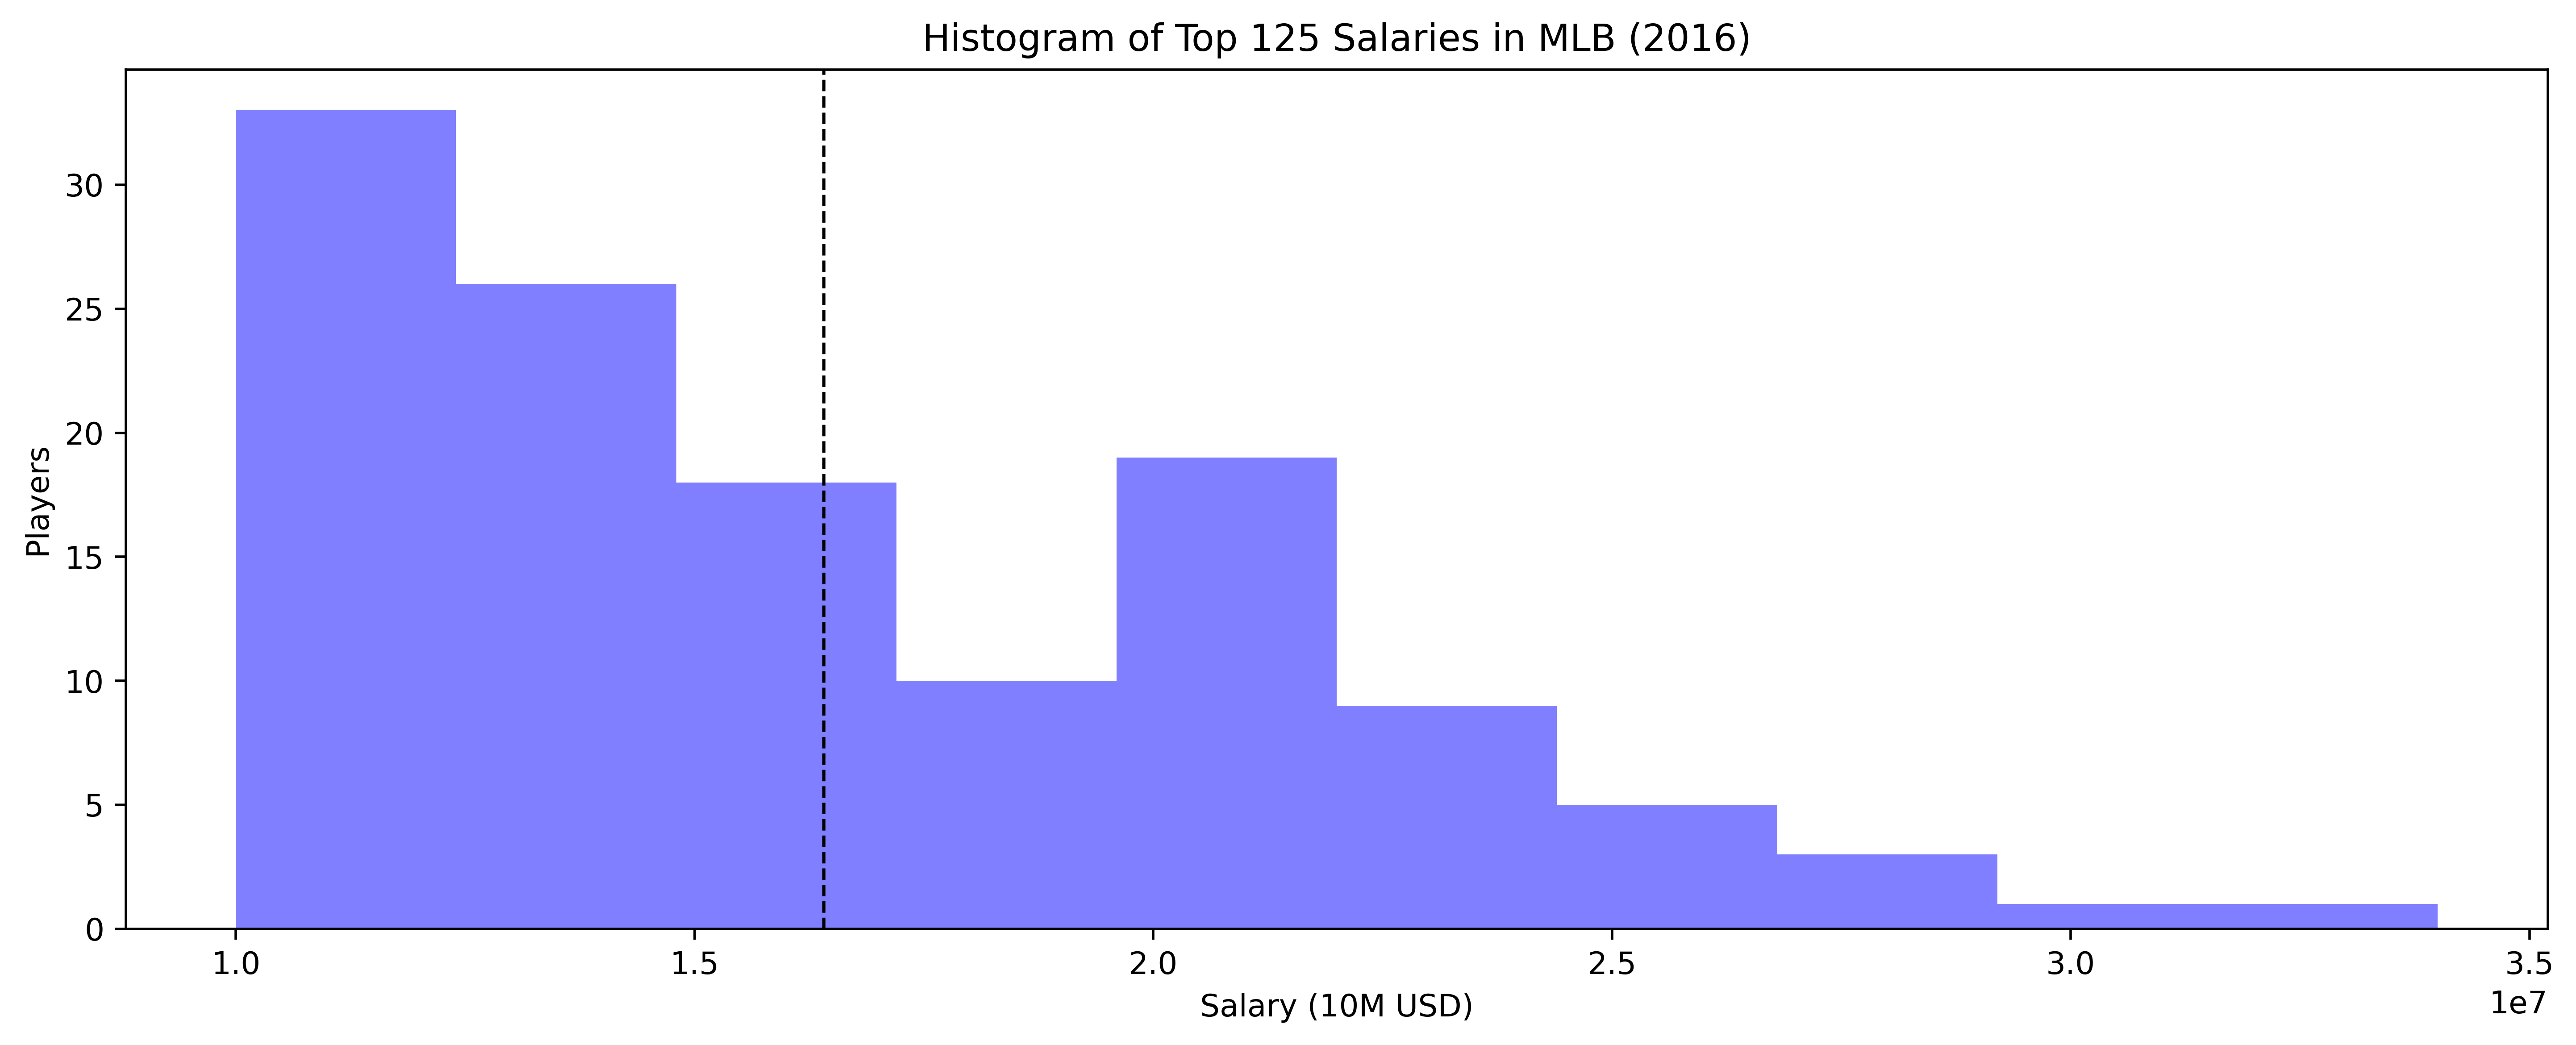

In [68]:
top_125 = top_salary_125['Salary'] #column of top salaries
plt.figure(figsize=(14,5),edgecolor='blue',dpi = 500) #figure of histogram
n, bins, patches = plt.hist(top_125, facecolor='blue', alpha=0.5)

plt.xlabel('Salary (10M USD)') #labels and styling
plt.ylabel('Players')
plt.axvline(top_125.mean(), color='k', linestyle='dashed', linewidth=1) #line marking the value of the Qualifying Offer
plt.title('Histogram of Top 125 Salaries in MLB (2016)')
plt.show()

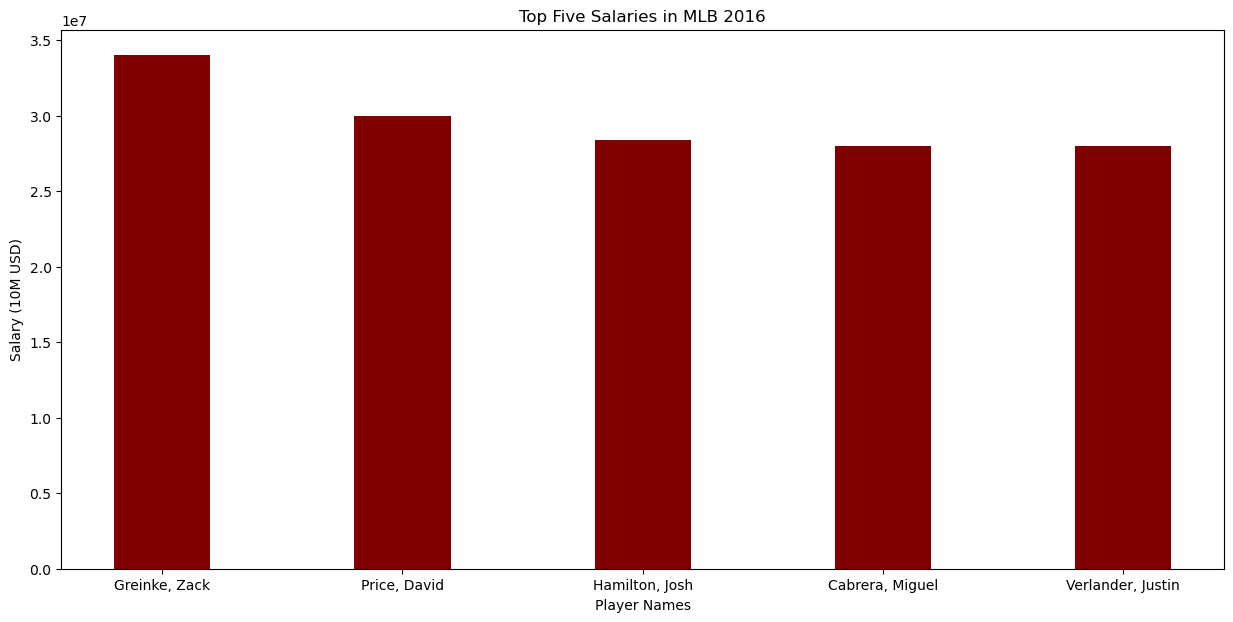

In [90]:
top_five = top_salary_125.nlargest(5,'Salary')
fig = plt.figure(figsize=(15, 7))
plt.bar(top_five['Player'], top_five['Salary'], color ='maroon', width = 0.4)

plt.xlabel("Player Names")
plt.ylabel("Salary (10M USD)")
plt.title("Top Five Salaries in MLB 2016")
plt.show()

## Citations List

- https://peps.python.org/pep-0257/
- https://www.bigocheatsheet.com/
- https://pandas.pydata.org/docs/reference/api/pandas.read_html.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html#pandas.DataFrame.drop
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html#pandas.DataFrame.replace
- https://www.geeksforgeeks.org/matplotlib-pyplot-hist-in-python/
- https://stackoverflow.com/questions/16180946/drawing-average-line-in-histogram